In [1]:
import numpy as np
from auxiliarymethods import  datasets as dp 
import auxiliarymethods.auxiliary_methods as aux
from matplotlib import pyplot as plt
from auxiliarymethods import reader
import pandas as pd
from sources import graph_analysis,clustering,dimensionality_reduction,outlier_detection, visualization, utility_functions
import networkx as nx
import seaborn as sns

# Which actors are outliers and how do their corresponding graphs look like? 

Load imdb-network:

In [2]:
imdb_networkx = reader.tud_to_networkx("IMDB-BINARY")

KeyboardInterrupt: 

Load the entire data and save it in variables:

In [3]:
classes = dp.get_dataset("IMDB-BINARY")
imdb_wl1_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl1.npz"))
imdb_wl2_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl2.npz"))
imdb_wl3_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl3.npz"))
imdb_wl4_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl4.npz"))
imdb_wl5_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl5.npz"))
imdb_graphlet_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_graphlet.npz"))
imdb_shortestpath_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_shortestpath.npz"))

imdb_wl1_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl1.csv"))
imdb_wl2_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl2.csv"))
imdb_wl3_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl3.csv"))
imdb_wl4_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl4.csv"))
imdb_wl5_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl5.csv"))
imdb_graphlet_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_graphlet.csv"))
imdb_shortestpath_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_shortestpath.csv"))

Applying dimensionality reduction on loaded data, to reduce the data to the most nessesary freatures. Here we reduce the data to 100 components.

In [4]:
#DIMENSIONALITY REDUCTION/ Feature Engeneering
tsvd_wl1_vectors = dimensionality_reduction.truncatedSVD(imdb_wl1_vectors, 100)
tsvd_wl2_vectors = dimensionality_reduction.truncatedSVD(imdb_wl2_vectors, 100)
tsvd_wl3_vectors = dimensionality_reduction.truncatedSVD(imdb_wl3_vectors, 100)
tsvd_wl4_vectors = dimensionality_reduction.truncatedSVD(imdb_wl4_vectors, 100)
tsvd_wl5_vectors = dimensionality_reduction.truncatedSVD(imdb_wl5_vectors, 100)
tsvd_graphlet_vectors = dimensionality_reduction.truncatedSVD(imdb_graphlet_vectors, 100)
tsvd_shortestpath_vectors = dimensionality_reduction.truncatedSVD(imdb_shortestpath_vectors, 100)

kpca_wl1_gram = dimensionality_reduction.kernelPCA(imdb_wl1_gram, 100)
kpca_wl2_gram = dimensionality_reduction.kernelPCA(imdb_wl2_gram, 100)
kpca_wl3_gram = dimensionality_reduction.kernelPCA(imdb_wl3_gram, 100)
kpca_wl4_gram = dimensionality_reduction.kernelPCA(imdb_wl4_gram, 100)
kpca_wl5_gram = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 100)
kpca_graphlet_gram = dimensionality_reduction.kernelPCA(imdb_graphlet_gram, 100)
kpca_shortestpath_gram = dimensionality_reduction.kernelPCA(imdb_shortestpath_gram, 100)
wl_listG = [kpca_wl1_gram,kpca_wl2_gram,kpca_wl3_gram,kpca_wl4_gram,kpca_wl5_gram]
wl_listV = [tsvd_wl1_vectors,tsvd_wl2_vectors,tsvd_wl3_vectors,tsvd_wl4_vectors,tsvd_wl5_vectors]

The svd_energy() function returns the amount of features, that are nessesary to obtain at least 90% of the energy. Here we show an example in the Weisfeller-Lehmann 1 dataset:

In [21]:
tsvd_wl1_vectors_energy = dimensionality_reduction.truncatedSVD(imdb_wl1_vectors, 100)
nrComponentsNeededToObtainEnergy = dimensionality_reduction.svd_energy(imdb_wl1_vectors, 100)
print("The abount of features that should remain to obtain 90% engergy: ", nrComponentsNeededToObtainEnergy)
tsvd_wl1_vectors_energy = np.delete(tsvd_wl1_vectors_energy, range(nrComponentsNeededToObtainEnergy-1, 99), 1)
print("The shape of the data after deleting the redundand columns ",tsvd_wl1_vectors_energy.shape)

The abount of features that should remain to obtain 90% engergy:  11
The shape of the data after deleting the redundand columns  (1000, 11)


Analyze the IMDB-Network:

In [25]:
graphs_romance = imdb_networkx[0:500]
graphs_action = imdb_networkx[500:1001]

graph_analysis.getGraphDataByClass(imdb_networkx,'Entire Dataset')
print()

graph_analysis.getGraphDataByClass(graphs_romance,'ROMANCE')

print()

graph_analysis.getGraphDataByClass(graphs_action,'ACTION')


Entire Dataset: 
Average number of edges:  96.531
Average number of nodes:  19.773
Average number of edges per nodes:  4.8819602488241545
Average density:  0.5206179238965227
Number of isomorphic pairs:  3356

ROMANCE: 
Average number of edges:  96.776
Average number of nodes:  20.114
Average number of edges per nodes:  4.811375161578999
Average density:  0.5592233563663693
Number of isomorphic pairs:  1321

ACTION: 
Average number of edges:  96.286
Average number of nodes:  19.432
Average number of edges per nodes:  4.955022643062989
Average density:  0.4820124914266759
Number of isomorphic pairs:  916


Here we collected some important information about the graphs. In the first block we look at the entire dataset-network, then at the romance-graphs and at the bottom at the action-graphs. We discovered two interesting things: 

The average density for romance-graphs is 0.0772 higher (compared to the action-graphs) and the romance-graphs have more isomorfic graph-pairs (also compared to the action-graphs).

The other information (average number of edges, nodes and edges per node) has not led to any results.

Example graph for genre romance


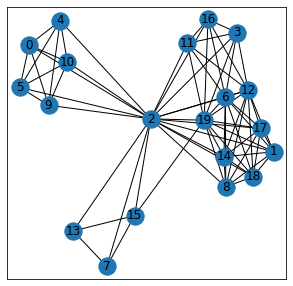


Example graph for genre action


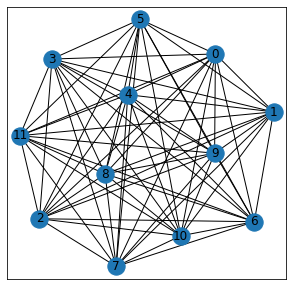

In [26]:
print('Example graph for genre romance')
visualization.visualize(graphs_romance[0])
print()
print('Example graph for genre action')
visualization.visualize(graphs_action[0])

Above we see two example ego-networks of different genres.

If you look below you see several plots. Each dataset is plotted four times as you can se below.

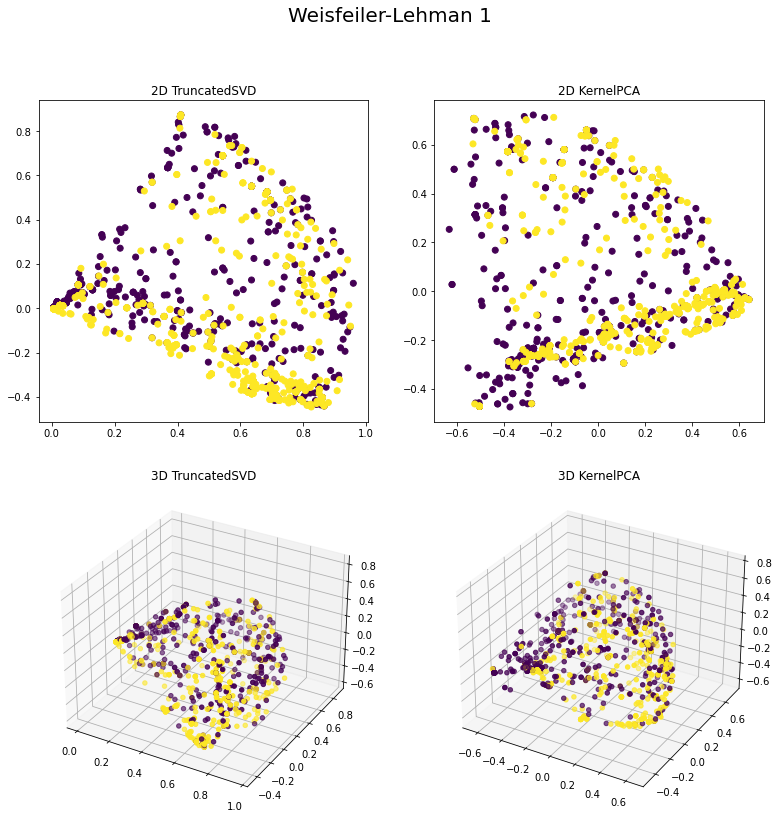

________________________________________________________________________________________


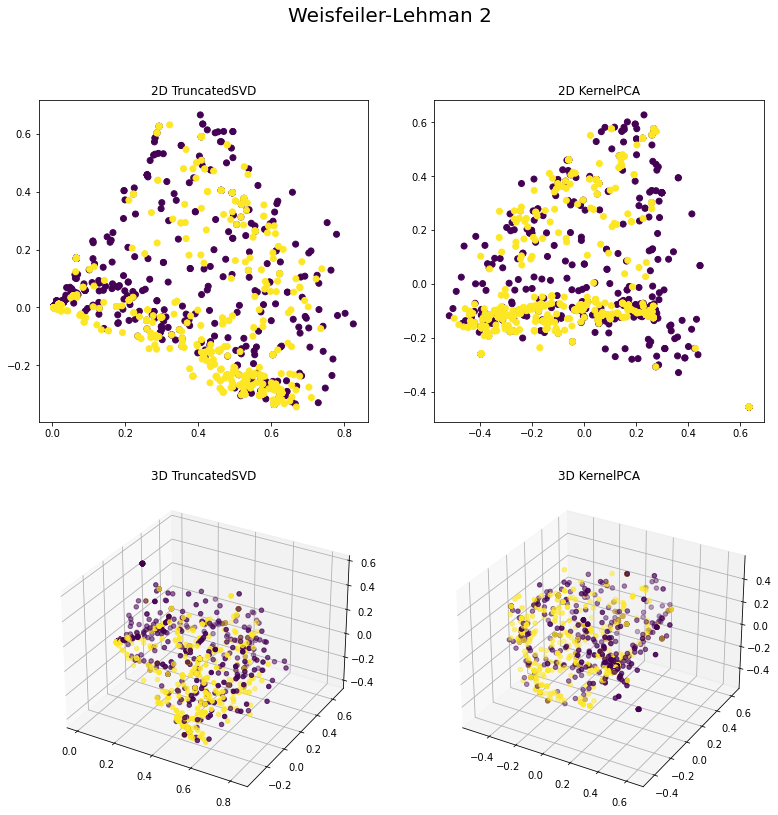

________________________________________________________________________________________


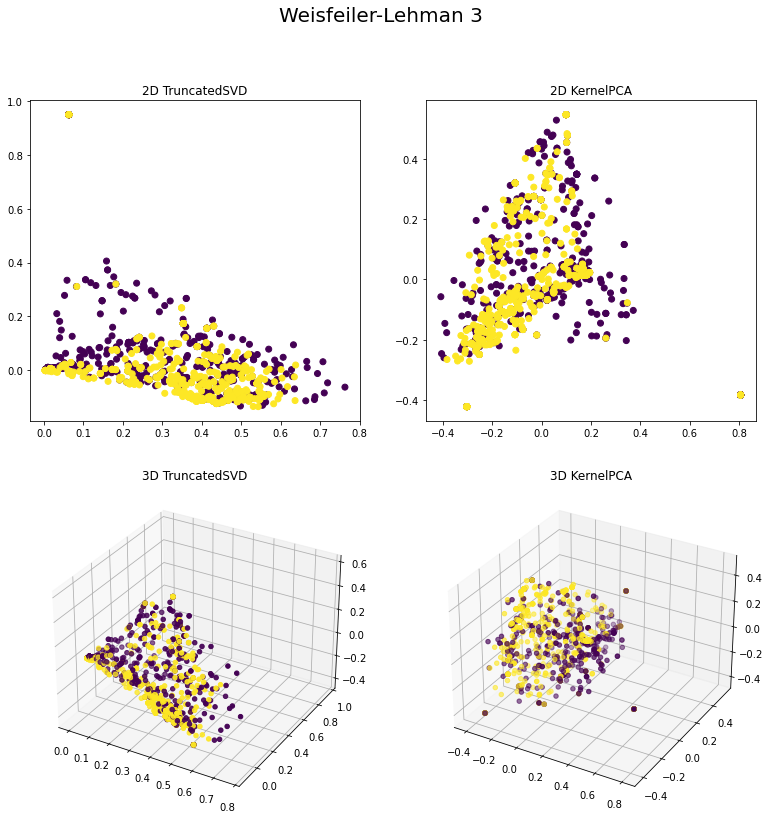

________________________________________________________________________________________


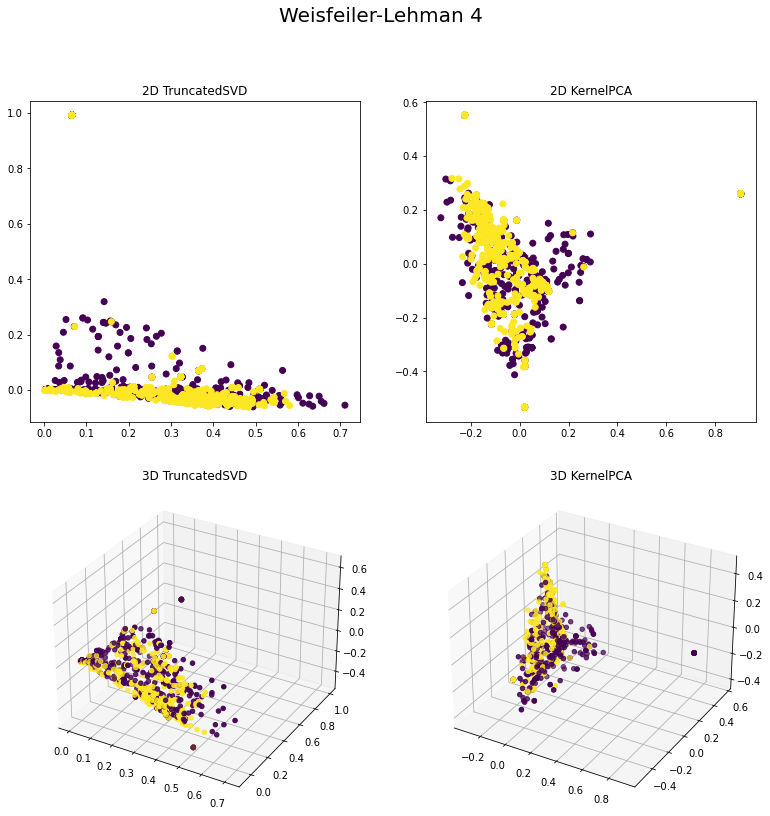

________________________________________________________________________________________


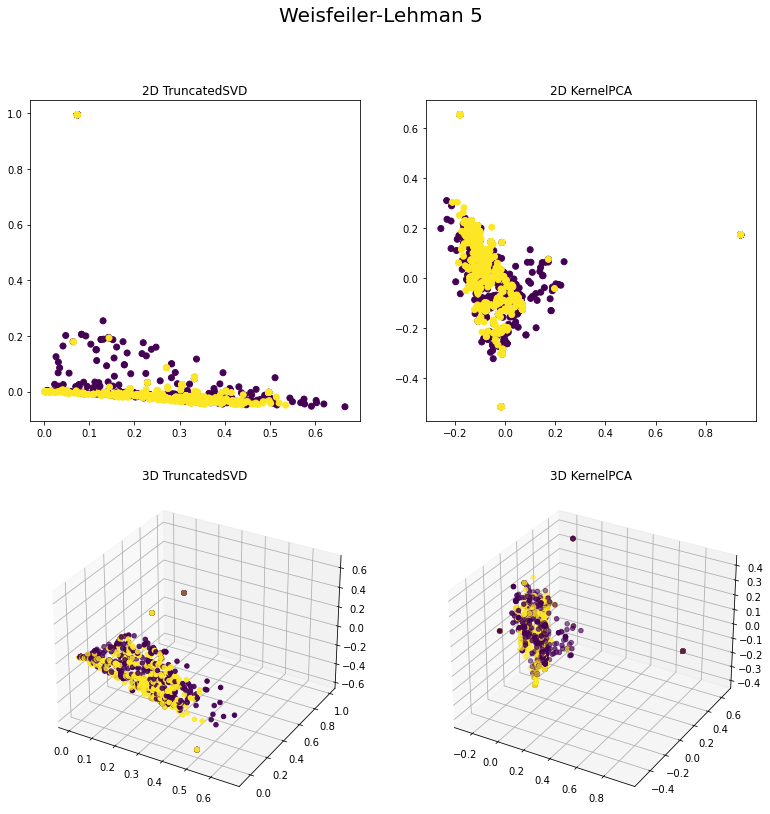

________________________________________________________________________________________


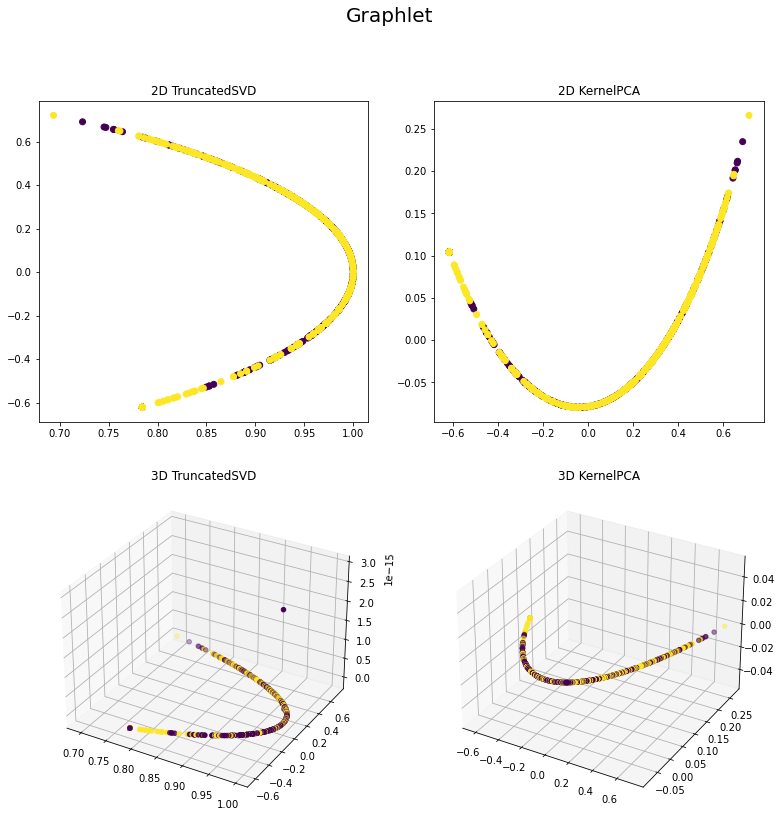

________________________________________________________________________________________


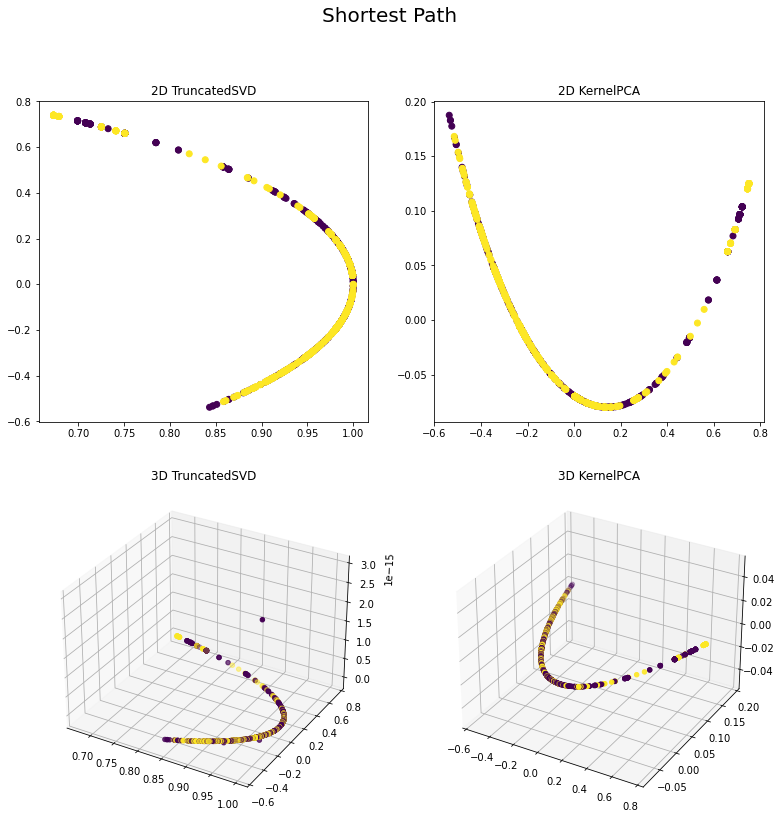

________________________________________________________________________________________


In [5]:
visualization.showEntireDataset(wl_listG, wl_listV, tsvd_graphlet_vectors, kpca_graphlet_gram, tsvd_shortestpath_vectors, kpca_shortestpath_gram, classes)

TODO: DESCRIBE PLOTS

Below there are several plots. Each dataset is plotted four times as you can se below. This time the datasets were normalized before dimentionality reduction was applied.

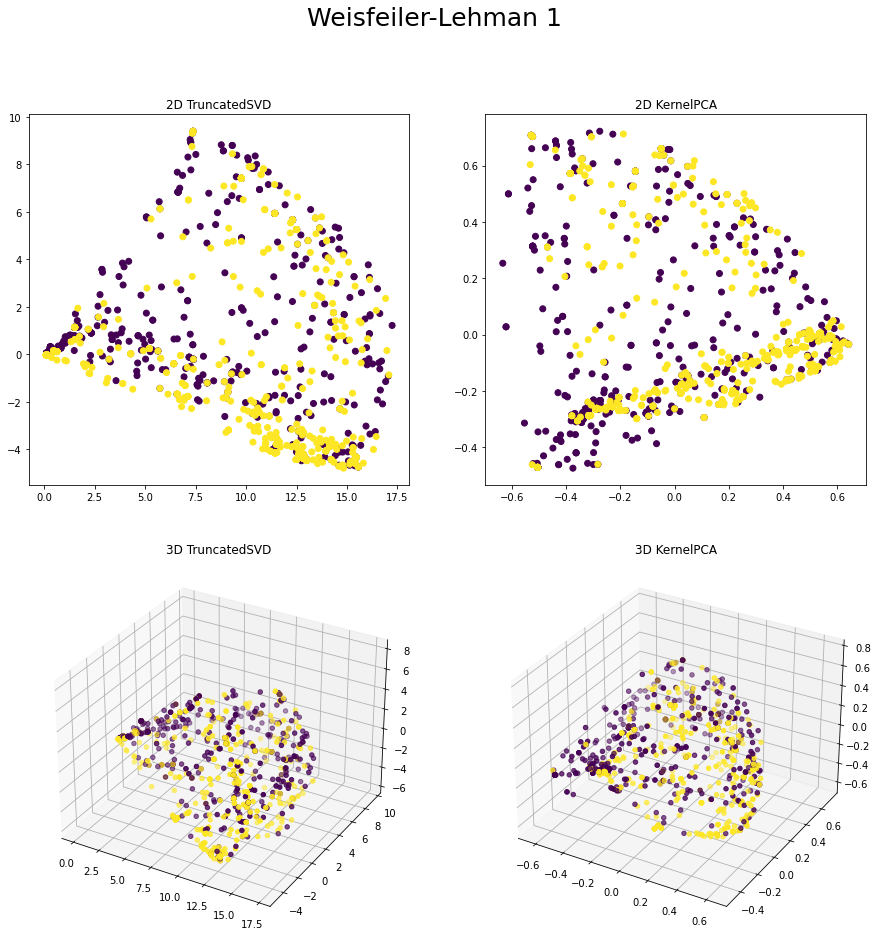

________________________________________________________________________________________


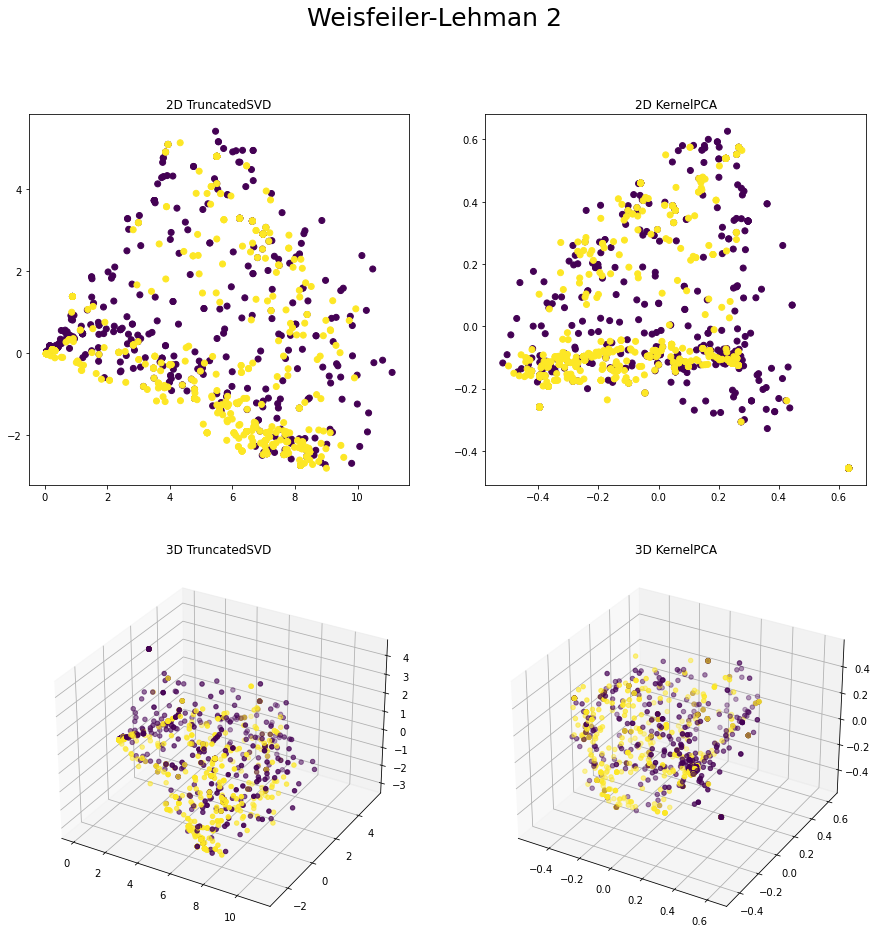

________________________________________________________________________________________


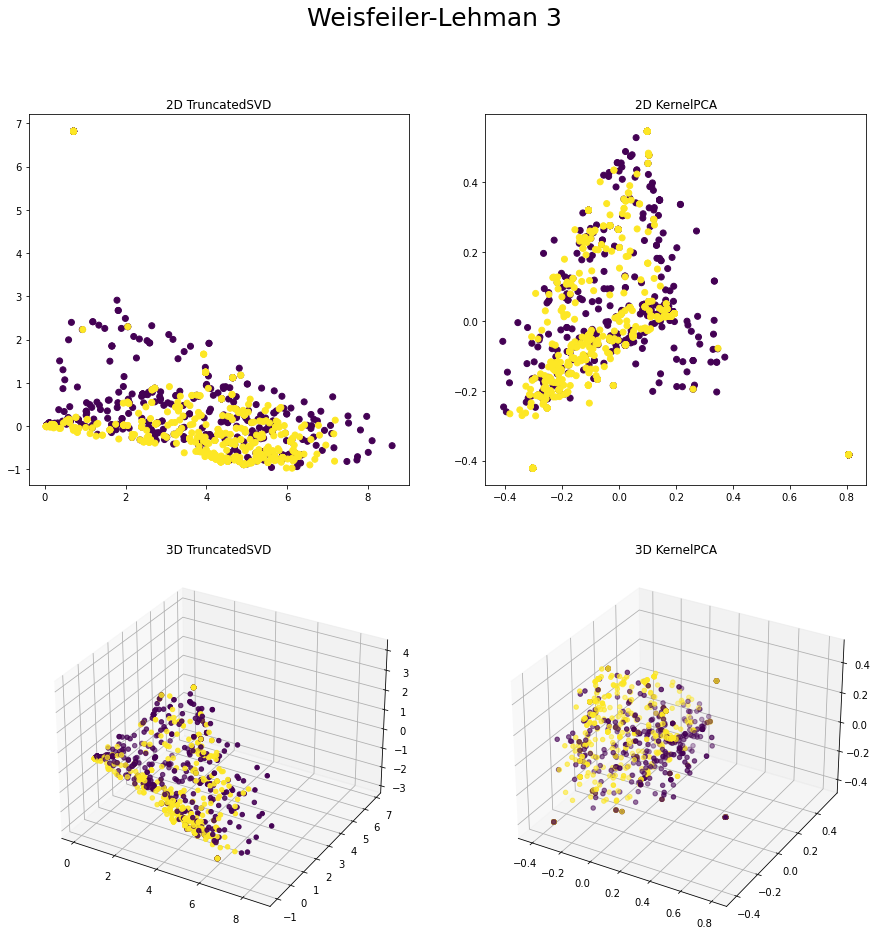

________________________________________________________________________________________


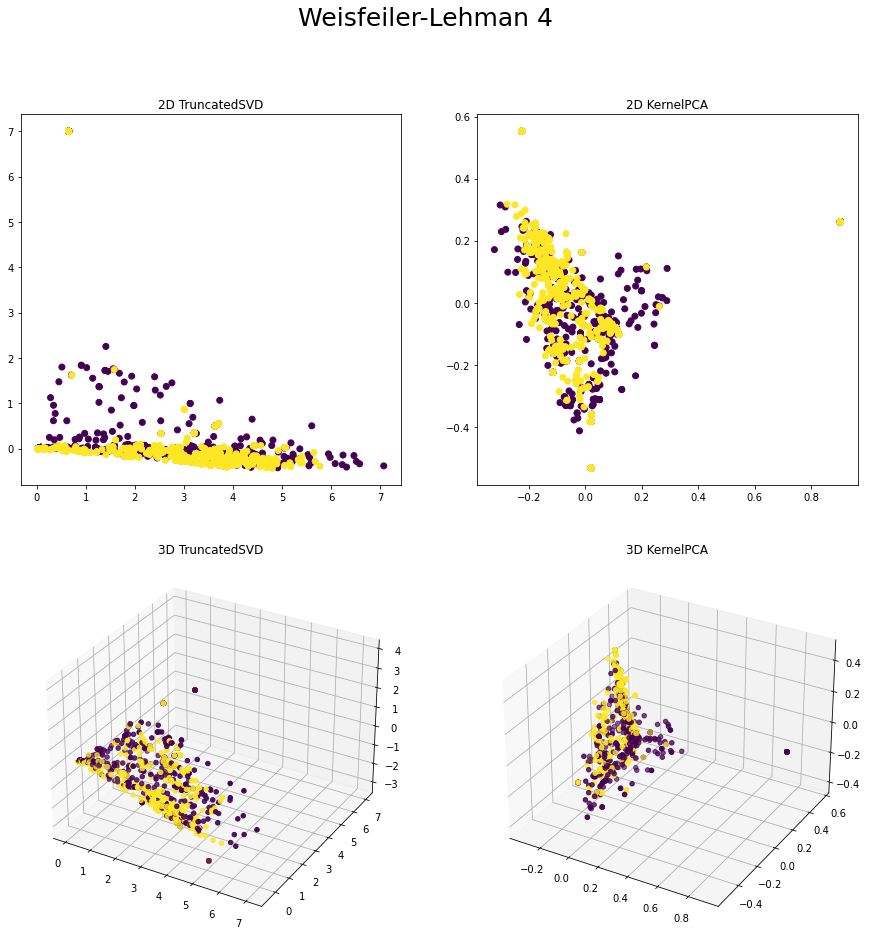

________________________________________________________________________________________


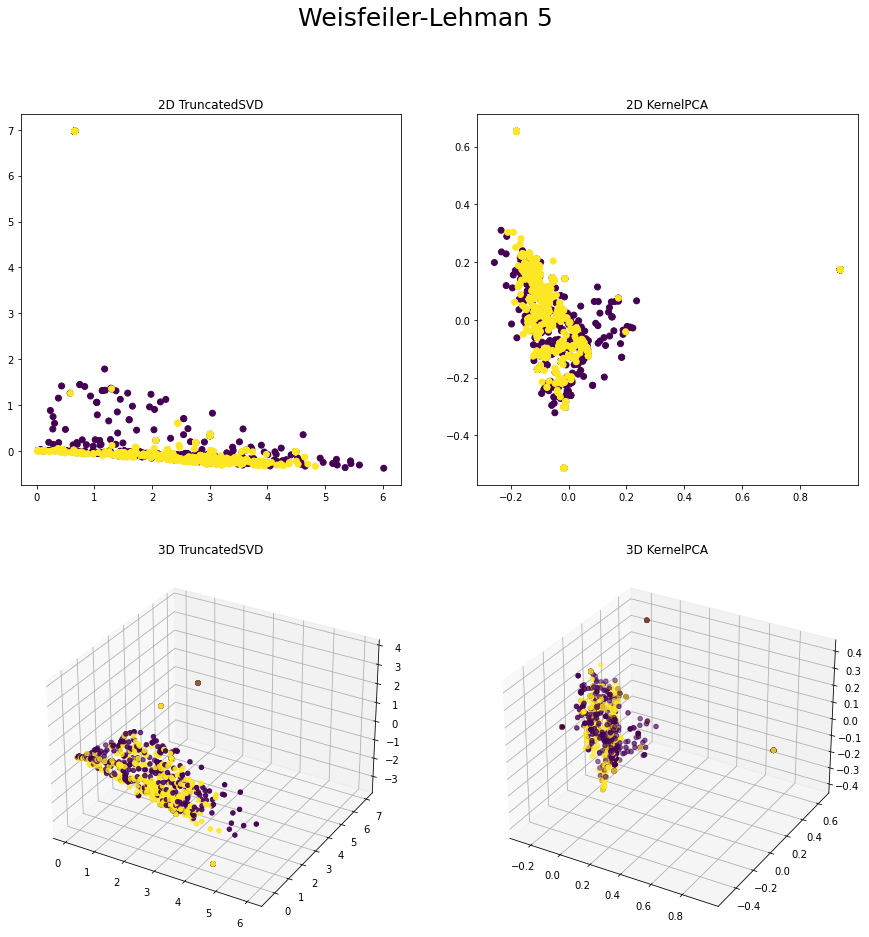

________________________________________________________________________________________


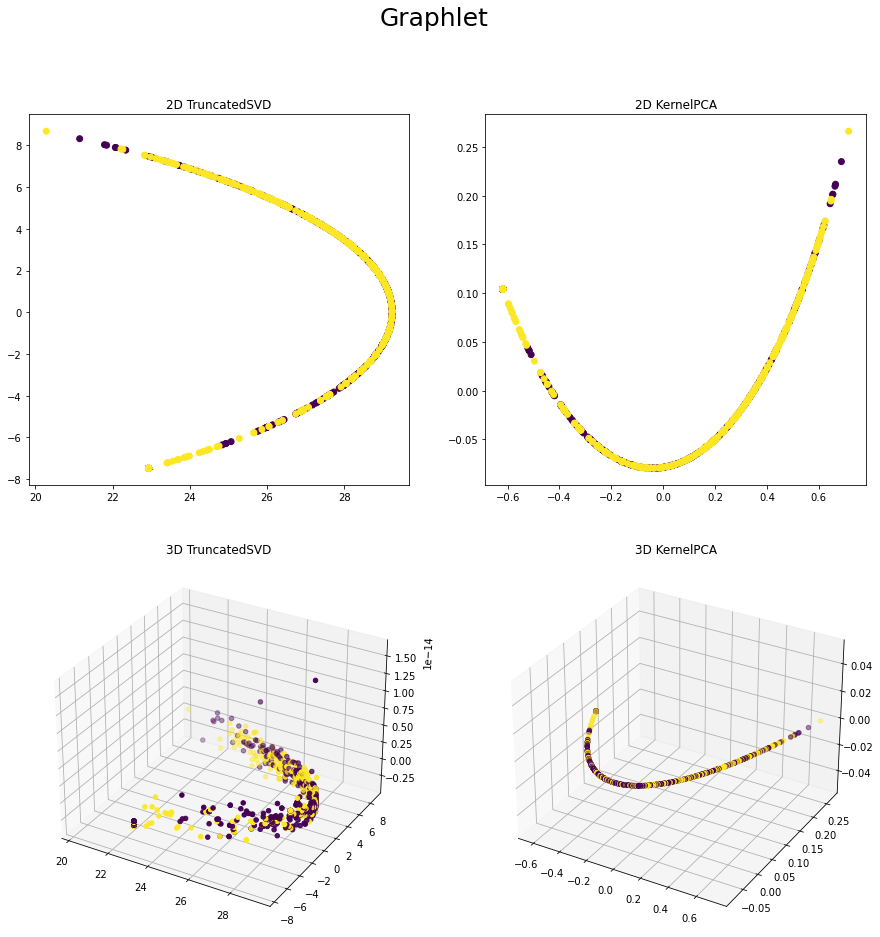

________________________________________________________________________________________


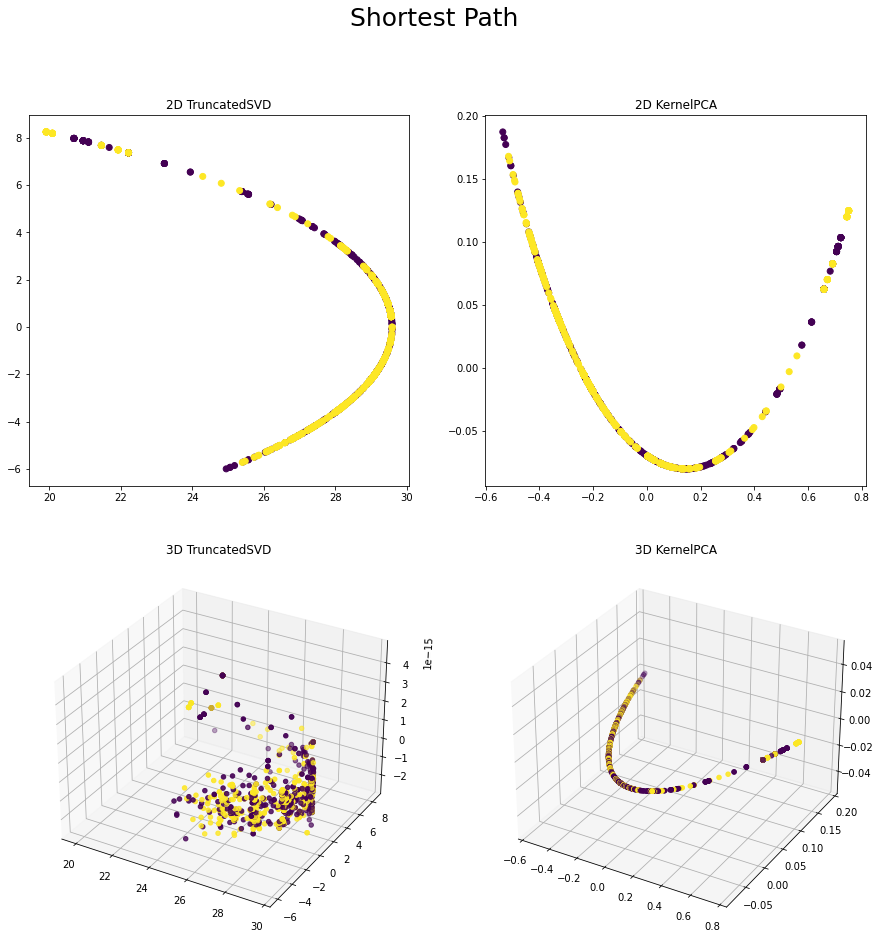

________________________________________________________________________________________


In [10]:
for i in range(1,8):
    if(i==6):
        gram_wl = utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_graphlet.csv")
    elif(i==7):
        gram_wl = utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_shortestpath.csv")
    else:
        gram_wl = utility_functions.load_csv(f"../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl{i}.csv")
    gram_wl = aux.normalize_gram_matrix(gram_wl)
    data_wl_svd = dimensionality_reduction.truncatedSVD(gram_wl, 3)
    data_wl_kpca = dimensionality_reduction.kernelPCA(gram_wl, 3)
    fig = plt.figure(figsize=(15,15))
    if(i==6):
        fig.suptitle('Graphlet',fontsize=25)
    elif(i==7):
        fig.suptitle('Shortest Path',fontsize=25)
    else:
        fig.suptitle(f'Weisfeiler-Lehman {i}',fontsize=25)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223,projection='3d')
    ax4 = fig.add_subplot(224,projection='3d')
    ax1.title.set_text('2D TruncatedSVD')
    ax2.title.set_text('2D KernelPCA')
    ax3.title.set_text('3D TruncatedSVD')
    ax4.title.set_text('3D KernelPCA')
    ax1.scatter(data_wl_svd[:,0],data_wl_svd[:,1],c=classes)
    ax2.scatter(data_wl_kpca[:,0],data_wl_kpca[:,1],c=classes)
    ax3.scatter3D(data_wl_svd[:,0],data_wl_svd[:,1],data_wl_svd[:,2],c=classes)
    ax4.scatter3D(data_wl_kpca[:,0],data_wl_kpca[:,1],data_wl_kpca[:,2],c=classes)
    plt.show()
    print("________________________________________________________________________________________")


Outlier Detection Try 1

In [ ]:
#OUTLIER DETECTION
test = outlier_detection.pandas_outlier_detection(tsvd_wl5_vectors)
print(len(test))
plt.scatter(test[:,0],test[:,1])
plt.title('Scatter plot')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

#tsvd_wl3_vectors
#0.4 47 
#0.2 47
#0.01 32
db = DBSCAN(eps=0.01,min_samples=32).fit(tsvd_wl3_vectors)

labels = db.labels_
print(set(labels))

plt.scatter(tsvd_wl3_vectors[:,0],tsvd_wl3_vectors[:,1] , c=labels)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

#tsvd_wl3_vectors
#0.08 20
testDataset = kpca_wl5_gram
db = DBSCAN(eps=0.08,min_samples=30).fit(testDataset)

labels = db.labels_
print(set(labels))

plt.scatter(testDataset[:,0],testDataset[:,1] , c=labels)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
from nrkmeans import NrKmeans
k=2
testDataset = kpca_wl5_gram
nrkm = NrKmeans(n_clusters=[k,1], allow_larger_noise_space=True)
nrkm.fit(testDataset, best_of_n_rounds=10, verbose=False)
print("Found Cluster Subspaces: ", nrkm.m)
print(nrkm.labels[0])

plt.scatter(testDataset[:,0],testDataset[:,1] , c=nrkm.labels[0])
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Was fällt auf ? 
Wl1 ist im Vergleich zu WL2-5 90° rotiert. Außerdem wird mit zunehmender Weisfeiler-lemann Iteration die Variation der Datenpunkte entlang der x bzw. y-Achse kleiner. 

In [ ]:
testDataset = kpca_wl5_gram

#outlier0, lower_bound0, upper_bound0 = outlier_detection.detect_outlier(testDataset[0])
#outlier1, lower_bound1, upper_bound1 = outlier_detection.detect_outlier(testDataset[1])



#plot data(without outliers)

visualization.showBoxplot(testDataset, "Weisfeller-Lehman 5 Boxplot")

visualization.scatterPlot2DBig(testDataset, "Weisfeller-Lehman 5", classes)

wl5WitoutOuliers, wl5outlierIndex = outlier_detection.seperateOutliers(testDataset, returnOutliers=False)
visualization.scatterPlot2DBig(wl5WitoutOuliers, "Weisfeller-Lehman 5 without outliers", classes)

outlier_detection.printOutlierCount(wl5outlierIndex)

wl5OnlyOuliers, wl5outlierIndex = outlier_detection.seperateOutliers(testDataset, returnOutliers=True)
visualization.scatterPlot2DBig(wl5OnlyOuliers, "Weisfeller-Lehman 5 only outliers", classes)



In [ ]:
#SHORTEST PATH
testDataset = kpca_shortestpath_gram

visualization.showBoxplot(testDataset, "Shortest path boxplot")

visualization.scatterPlot2DBig(testDataset, "Shorted Path", classes)

shortestPathWithoutOutliers, shortestPathOutlierIndex = outlier_detection.seperateOutliersWithRange(testDataset, -0.6, 0.55, -0.2, 0.175, returnOutliers=False)
visualization.scatterPlot2DBig(shortestPathWithoutOutliers, "Shorted Path without outliers", classes)

outlier_detection.printOutlierCount(shortestPathOutlierIndex)

shortestPathOnlyOutliers, shortestPathOutlierIndex = outlier_detection.seperateOutliersWithRange(testDataset, -0.6, 0.55, -0.2, 0.175, returnOutliers=True)
visualization.scatterPlot2DBig(shortestPathOnlyOutliers, "Shorted Path without outliers", classes)

In [ ]:
#Graphlet
testDataset = kpca_graphlet_gram

visualization.showBoxplot(testDataset, "Graphlet boxplot")

visualization.scatterPlot2DBig(testDataset, "Shorted Path", classes)

graphletWithoutOutliers, graphletOultiersIndex = outlier_detection.seperateOutliersWithRange(testDataset, -0.6, 0.66, -0.2, 0.22, returnOutliers=False)
visualization.scatterPlot2DBig(graphletWithoutOutliers, "Shorted Path without outliers", classes)

outlier_detection.printOutlierCount(graphletOultiersIndex)

graphletOnlyOutliers, graphletOultiersIndex = outlier_detection.seperateOutliersWithRange(testDataset, -0.6, 0.66, -0.2, 0.22, returnOutliers=True)
visualization.scatterPlot2DBig(graphletOnlyOutliers, "Shorted Path without outliers", classes)

In [ ]:
imdb_networkx= reader.tud_to_networkx(ds_name)

In [ ]:
sharedOutliers = [0] * 1000
for i in range(len(imdb_networkx)):
    if wl5outlierIndex[i] == 1 and shortestPathOutlierIndex[i] == 1 and graphletOultiersIndex[i] == 1:
        sharedOutliers[i] = 1

print('\033[1m' + "*** SHARED OUTLIERS ***" + '\033[0m')
outlier_detection.printOutlierCount(sharedOutliers)

In [ ]:
imbd_networkWithoutOutliers = []
imbd_networkOnlyOutliers = []
for i in range(len(imdb_networkx)):
    if sharedOutliers[i] == 1:
        imbd_networkOnlyOutliers.append(imdb_networkx[i])
    else:
        imbd_networkWithoutOutliers.append(imdb_networkx[i])
        
print()

#Compare data without outliers

graph_analysis.getGraphDataByClass(imbd_networkWithoutOutliers,'IMDB Network without outliers')
#visualization.visualize(imbd_networkWithoutOutliers[0])
#visualization.visualize(imbd_networkWithoutOutliers[40])
#visualization.visualize(imbd_networkWithoutOutliers[20])

print()
graph_analysis.getGraphDataByClass(imbd_networkOnlyOutliers, 'IMDB Network only outliers')
visualization.visualize(imbd_networkOnlyOutliers[0])
#visualization.visualize(imdb_networkx[9])
#visualization.visualize(imbd_networkOnlyOutliers[1])
#visualization.visualize(imbd_networkOnlyOutliers[2])
#visualization.visualize(imbd_networkOnlyOutliers[3])
#visualization.visualize(imbd_networkOnlyOutliers[4])
#visualization.visualize(imbd_networkOnlyOutliers[-1])
#for i in range(len(imbd_networkOnlyOutliers)):
#    visualization.visualize(imbd_networkOnlyOutliers[i])

Average density of outliers is:  0.9817967125406231

In [ ]:
testDataset = kpca_wl5_gram
outlier0, lower_bound0, upper_bound0 = outlier_detection.detect_outlier(testDataset[0])
outlier1, lower_bound1, upper_bound1 = outlier_detection.detect_outlier(testDataset[1])
print(lower_bound0, upper_bound0)
print(lower_bound1, upper_bound1)

#outliers = [x for x in testDataset if x <= lower_bound or x >= upper_bound]

plt.scatter(testDataset[:,0],testDataset[:,1])
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
gram_wl = utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl5.csv")
gram_wl = aux.normalize_gram_matrix(gram_wl) 
kpca = visualisation.kernelPCA(gram_wl,classes,'test')
clustering.kMeans_scree_plot(kpca)